In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [31]:
df1 = pd.read_csv("aug_train.csv")
df2 = pd.read_csv("aug_test.csv")
df3 = pd.read_csv("sample_submission.csv")

In [32]:
df1

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0


In [33]:
df2

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,57782,Female,34,1,39.0,1,1-2 Year,No,38244.0,124.0,146
1,286811,Female,55,1,28.0,0,> 2 Years,Yes,37577.0,122.0,109
2,117823,Male,39,1,28.0,1,1-2 Year,No,24578.0,26.0,63
3,213992,Male,28,1,50.0,1,1-2 Year,No,40507.0,8.0,129
4,324756,Female,24,1,10.0,0,< 1 Year,Yes,36783.0,152.0,201
...,...,...,...,...,...,...,...,...,...,...,...
78268,847,Male,43,1,39.0,0,1-2 Year,Yes,2630.0,124.0,26
78269,417524,Female,21,1,12.0,1,< 1 Year,No,32937.0,152.0,185
78270,188087,Male,48,1,29.0,1,1-2 Year,No,35247.0,124.0,101
78271,215680,Male,64,1,5.0,1,1-2 Year,No,25705.0,26.0,86


In [34]:
df4 = pd.merge(df2, df3)
df4

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,57782,Female,34,1,39.0,1,1-2 Year,No,38244.0,124.0,146,0.5
1,286811,Female,55,1,28.0,0,> 2 Years,Yes,37577.0,122.0,109,0.5
2,117823,Male,39,1,28.0,1,1-2 Year,No,24578.0,26.0,63,0.5
3,213992,Male,28,1,50.0,1,1-2 Year,No,40507.0,8.0,129,0.5
4,324756,Female,24,1,10.0,0,< 1 Year,Yes,36783.0,152.0,201,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
78268,847,Male,43,1,39.0,0,1-2 Year,Yes,2630.0,124.0,26,0.5
78269,417524,Female,21,1,12.0,1,< 1 Year,No,32937.0,152.0,185,0.5
78270,188087,Male,48,1,29.0,1,1-2 Year,No,35247.0,124.0,101,0.5
78271,215680,Male,64,1,5.0,1,1-2 Year,No,25705.0,26.0,86,0.5


In [35]:
df = pd.concat([df1, df4], ignore_index=True)
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0.0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0.0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0.0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0.0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
460422,847,Male,43,1,39.0,0,1-2 Year,Yes,2630.0,124.0,26,0.5
460423,417524,Female,21,1,12.0,1,< 1 Year,No,32937.0,152.0,185,0.5
460424,188087,Male,48,1,29.0,1,1-2 Year,No,35247.0,124.0,101,0.5
460425,215680,Male,64,1,5.0,1,1-2 Year,No,25705.0,26.0,86,0.5


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460427 entries, 0 to 460426
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    460427 non-null  int64  
 1   Gender                460427 non-null  object 
 2   Age                   460427 non-null  int64  
 3   Driving_License       460427 non-null  int64  
 4   Region_Code           460427 non-null  float64
 5   Previously_Insured    460427 non-null  int64  
 6   Vehicle_Age           460427 non-null  object 
 7   Vehicle_Damage        460427 non-null  object 
 8   Annual_Premium        460427 non-null  float64
 9   Policy_Sales_Channel  460427 non-null  float64
 10  Vintage               460427 non-null  int64  
 11  Response              460427 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 42.2+ MB


In [37]:
df.select_dtypes("number")

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,22,1,7.0,1,2630.0,152.0,16,0.0
1,17163,42,1,28.0,0,43327.0,26.0,135,0.0
2,32023,66,1,33.0,0,35841.0,124.0,253,0.0
3,87447,22,1,33.0,0,27645.0,152.0,69,0.0
4,501933,28,1,46.0,1,29023.0,152.0,211,0.0
...,...,...,...,...,...,...,...,...,...
460422,847,43,1,39.0,0,2630.0,124.0,26,0.5
460423,417524,21,1,12.0,1,32937.0,152.0,185,0.5
460424,188087,48,1,29.0,1,35247.0,124.0,101,0.5
460425,215680,64,1,5.0,1,25705.0,26.0,86,0.5


In [38]:
df["Gender"] = df.Gender.replace("Male", 1)

In [39]:
df["Gender"] = df.Gender.replace("Female", 2)

In [40]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,1,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0.0
1,17163,1,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0.0
2,32023,2,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0.0
3,87447,2,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0.0
4,501933,1,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
460422,847,1,43,1,39.0,0,1-2 Year,Yes,2630.0,124.0,26,0.5
460423,417524,2,21,1,12.0,1,< 1 Year,No,32937.0,152.0,185,0.5
460424,188087,1,48,1,29.0,1,1-2 Year,No,35247.0,124.0,101,0.5
460425,215680,1,64,1,5.0,1,1-2 Year,No,25705.0,26.0,86,0.5


In [41]:
df.Vehicle_Age.unique()

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

In [42]:
df.loc[(df.Vehicle_Age == "< 1 Year") , "Vehicle_Age"] = 1

In [46]:
df.loc[(df.Vehicle_Age == "1-2 Year") , "Vehicle_Age"] = 2

In [43]:
df.loc[(df.Vehicle_Age == "> 2 Years") , "Vehicle_Age"] = 3

In [44]:
df.loc[(df.Vehicle_Damage == "No") , "Vehicle_Damage"] = 0
df.loc[(df.Vehicle_Damage == "Yes") , "Vehicle_Damage"] = 1

In [47]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,1,22,1,7.0,1,1,0,2630.0,152.0,16,0.0
1,17163,1,42,1,28.0,0,2,1,43327.0,26.0,135,0.0
2,32023,2,66,1,33.0,0,2,1,35841.0,124.0,253,0.0
3,87447,2,22,1,33.0,0,1,0,27645.0,152.0,69,0.0
4,501933,1,28,1,46.0,1,1,0,29023.0,152.0,211,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
460422,847,1,43,1,39.0,0,2,1,2630.0,124.0,26,0.5
460423,417524,2,21,1,12.0,1,1,0,32937.0,152.0,185,0.5
460424,188087,1,48,1,29.0,1,2,0,35247.0,124.0,101,0.5
460425,215680,1,64,1,5.0,1,2,0,25705.0,26.0,86,0.5


<Axes: >

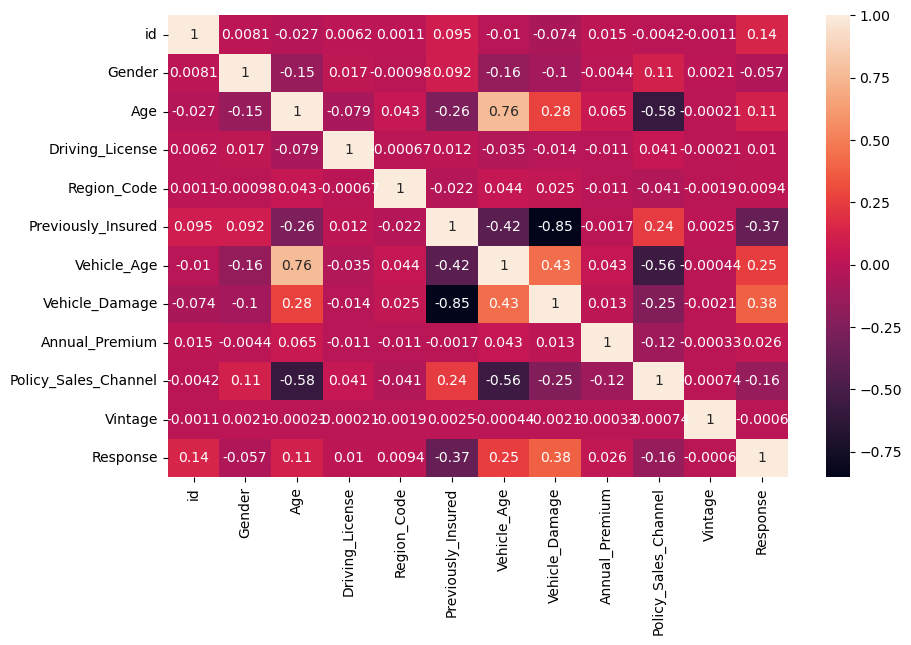

In [48]:
sns.heatmap(df.corr(), annot=True)

In [49]:
df.Driving_License.value_counts()

Driving_License
1    459537
0       890
Name: count, dtype: int64

In [52]:
df = df.drop(['Vintage', 'Region_Code', "Annual_Premium", "Driving_License"], axis=1)
df

,id,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
0,167647,1,22,1,1,0,152.0,0.0
1,17163,1,42,0,2,1,26.0,0.0
2,32023,2,66,0,2,1,124.0,0.0
3,87447,2,22,0,1,0,152.0,0.0
4,501933,1,28,1,1,0,152.0,0.0
...,...,...,...,...,...,...,...,...
460422,847,1,43,0,2,1,124.0,0.5
460423,417524,2,21,1,1,0,152.0,0.5
460424,188087,1,48,1,2,0,124.0,0.5
460425,215680,1,64,1,2,0,26.0,0.5


<Axes: >

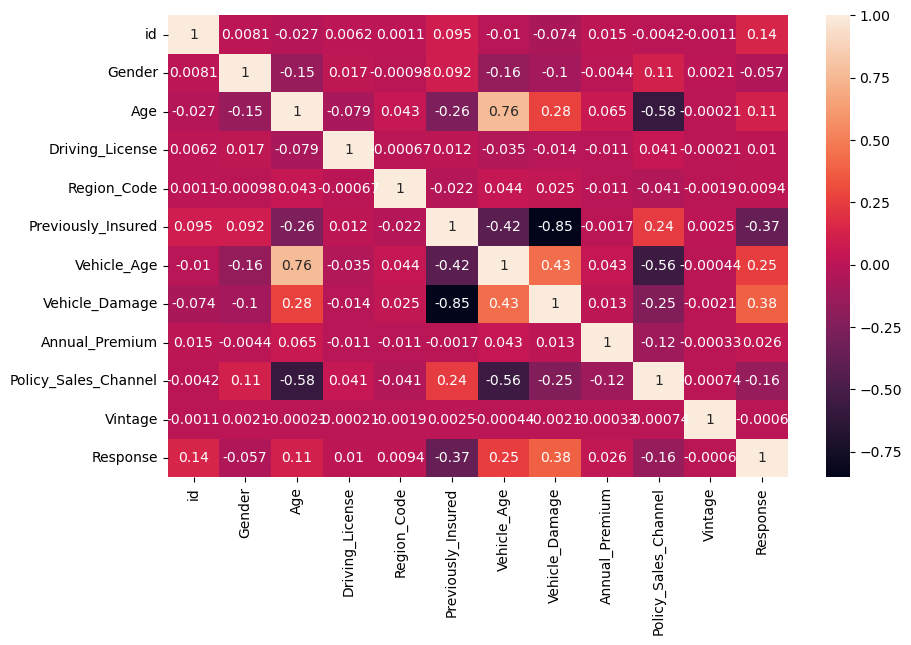

In [51]:
sns.heatmap(df.corr(), annot=True)